<a href="https://colab.research.google.com/github/mohsenshekarabi/homework3_datamining/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#@title Get Dataset CSV File From Github
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/mohsenshekarabi/homework3_datamining/main/Behavioral_Risk_Factor_Data__Heart_Disease___Stroke_Prevention.csv")
data = pd.DataFrame()

In [ ]:
#@title Show Information About Dataset
dataset.info()

In [33]:
#@title Show 5 Record From Dataset
dataset.head()

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,Category,Topic,Indicator,...,Confidence_Limit_Low,Confidence_Limit_High,CategoryID,TopicID,IndicatorID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation,Unnamed: 26
0,2011,NV,Nevada,BRFSS,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,...,Statistically unstable estimates not presented...,NaN,NaN,C1,T4,BR001,BOC03,AGE04,32,"(39.493240390000494, -117.07184056399967)"
1,2011,NV,Nevada,BRFSS,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,...,Statistically unstable estimates not presented...,NaN,NaN,C1,T4,BR001,BOC04,RAC02,32,"(39.493240390000494, -117.07184056399967)"
2,2011,NV,Nevada,BRFSS,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,...,Statistically unstable estimates not presented...,NaN,NaN,C1,T4,BR001,BOC03,AGE01,32,"(39.493240390000494, -117.07184056399967)"
3,2011,NV,Nevada,BRFSS,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,...,Statistically unstable estimates not presented...,NaN,NaN,C1,T4,BR001,BOC04,RAC07,32,"(39.493240390000494, -117.07184056399967)"
4,2011,NV,Nevada,BRFSS,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,...,Statistically unstable estimates not presented...,NaN,NaN,C1,T4,BR001,BOC04,RAC04,32,"(39.493240390000494, -117.07184056399967)"


In [34]:
#@title Preprocessing - Encode Data
from sklearn.preprocessing import LabelEncoder

for i in range(len(dataset.columns)):
    encoder = LabelEncoder()
    data[dataset.columns[i]] = encoder.fit_transform(dataset[dataset.columns[i]])

In [35]:
#@title Preprocessing - StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

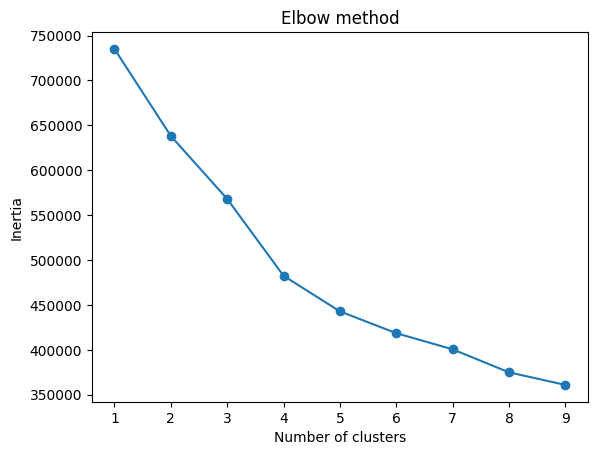

In [36]:
#@title Show digram Numbers Kmeans Cluster 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []

Max_Num = 10

for i in range (1, Max_Num):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, Max_Num), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
#@title Select Cluster Number 5 And Fit Model

kmeans = KMeans(n_clusters=5)

clusters = kmeans.fit_predict(data)

clusters = pd.DataFrame(clusters)

dataset['clusters'] = clusters 

print(dataset)
  
